In [ ]:
!pip install numpy pandas matplotlib scikit-learn mne --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.5 MB/s eta 0:00:00


In [ ]:
!wget -q https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf -O S001R01.edf


Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
Using matplotlib as 2D backend.


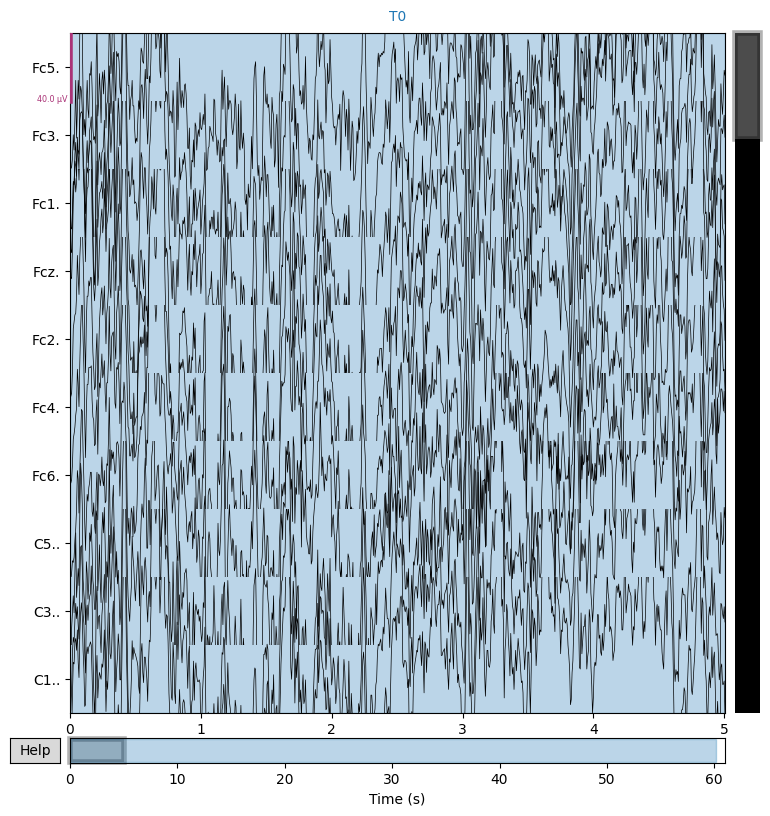

In [26]:
import mne
import matplotlib.pyplot as plt

file_path = 'S001R01.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
print(raw.info)
raw.plot(duration=5, n_channels=10)
plt.show()


In [1]:
# Band-pass filtering to remove very low and high frequency noise
raw.filter(1., 50., fir_design='firwin')


NameError: name 'raw' is not defined

In [27]:
file_path = 'S001R01.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [28]:
import mne
import matplotlib.pyplot as plt


In [6]:
!pip install mne --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 70.8 MB/s eta 0:00:00


In [7]:
import mne
import matplotlib.pyplot as plt


In [8]:
!wget -q https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf -O S001R01.edf


In [9]:
file_path = 'S001R01.edf'


raw = mne.io.read_raw_edf(file_path, preload=True)


print(raw.info)


Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


In [10]:
# Band-pass filter to keep only 1–50 Hz EEG signals
raw.filter(1., 50., fir_design='firwin')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

In [29]:
from mne.preprocessing import ICA

ica = ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)


eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices
ica.apply(raw)


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components


/tmp/ipython-input-29-1152527386.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.2s.


RuntimeError: No EOG channel(s) found

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import psd_welch

# محاسبه PSD (Power Spectral Density) با روش Welch
psd, freqs = psd_welch(raw, fmin=1, fmax=50, n_fft=2048)

# میانگین توان در باندهای فرکانسی مختلف
delta = psd[:, (freqs >= 1) & (freqs <= 4)].mean(axis=1)
theta = psd[:, (freqs >= 4) & (freqs <= 8)].mean(axis=1)
alpha = psd[:, (freqs >= 8) & (freqs <= 13)].mean(axis=1)
beta  = psd[:, (freqs >= 13) & (freqs <= 30)].mean(axis=1)

# نمایش توان‌ها برای اولین 5 کانال
print("Delta power (first 5 channels):", delta[:5])
print("Theta power (first 5 channels):", theta[:5])
print("Alpha power (first 5 channels):", alpha[:5])
print("Beta power  (first 5 channels):", beta[:5])

# رسم توان باند آلفا برای اولین 5 کانال
plt.bar(np.arange(5), alpha[:5])
plt.xlabel('Channel')
plt.ylabel('Alpha power')
plt.title('Alpha band power in first 5 EEG channels')
plt.show()

ImportError: cannot import name 'psd_welch' from 'mne.preprocessing' (/usr/local/lib/python3.11/dist-packages/mne/preprocessing/__init__.py)

/tmp/ipython-input-22-2119495646.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[freq_ix], f[freq_ix])  # Area under the PSD curve
/tmp/ipython-input-22-2119495646.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[freq_ix], f[freq_ix])  # Area under the PSD curve


Delta power (first 5 channels): [np.float64(9.296270309601559e-10), np.float64(9.40517306766396e-10), np.float64(9.601219814543743e-10), np.float64(9.169849937288613e-10), np.float64(8.536437625916019e-10)]
Theta power (first 5 channels): [np.float64(2.792827871624287e-10), np.float64(3.1722553712529527e-10), np.float64(3.4241055249511016e-10), np.float64(3.5396453893580603e-10), np.float64(3.0618878823487117e-10)]
Alpha power (first 5 channels): [np.float64(1.663518962744258e-10), np.float64(2.1208702196876213e-10), np.float64(1.9909051395078659e-10), np.float64(1.9241789841042927e-10), np.float64(1.793489673346836e-10)]
Beta power  (first 5 channels): [np.float64(1.7178916110425485e-10), np.float64(1.8472269787470913e-10), np.float64(1.8131153124503776e-10), np.float64(1.7698467116768415e-10), np.float64(1.5741432089019907e-10)]


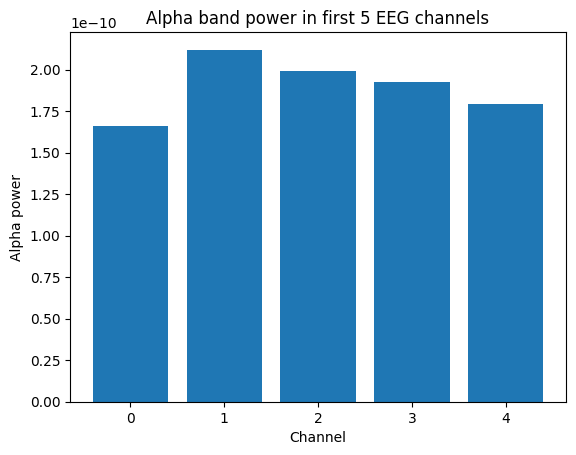

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import mne

# Get raw data and sampling frequency from the MNE raw object
data, times = raw[:,:]  # all channels and all time
sfreq = raw.info['sfreq']  # sampling frequency

# Define frequency bands
bands = {'Delta': (1, 4),
         'Theta': (4, 8),
         'Alpha': (8, 13),
         'Beta': (13, 30)}

# Function to calculate band power
def bandpower(data, sf, band):
    fmin, fmax = band
    f, Pxx = welch(data, sf, nperseg=2048)
    # Select frequencies within the band
    freq_ix = np.logical_and(f >= fmin, f <= fmax)
    return np.trapz(Pxx[freq_ix], f[freq_ix])  # Area under the PSD curve

# Calculate power for each band and channel
powers = {band: [] for band in bands}
for ch in range(data.shape[0]):
    for band in bands:
        bp = bandpower(data[ch], sfreq, bands[band])
        powers[band].append(bp)

# Display powers for the first 5 channels (for Alpha band as an example)
print("Delta power (first 5 channels):", powers['Delta'][:5])
print("Theta power (first 5 channels):", powers['Theta'][:5])
print("Alpha power (first 5 channels):", powers['Alpha'][:5])
print("Beta power  (first 5 channels):", powers['Beta'][:5])


# Plot Alpha band power for the first 5 channels
plt.bar(np.arange(5), powers['Alpha'][:5])
plt.xlabel('Channel')
plt.ylabel('Alpha power')
plt.title('Alpha band power in first 5 EEG channels')
plt.show()

/tmp/ipython-input-18-2816238726.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[freq_ix], f[freq_ix])  # مساحت زیر نمودار PSD


Alpha power (first 5 channels): [np.float64(1.663518962744258e-10), np.float64(2.1208702196876213e-10), np.float64(1.9909051395078659e-10), np.float64(1.9241789841042927e-10), np.float64(1.793489673346836e-10)]


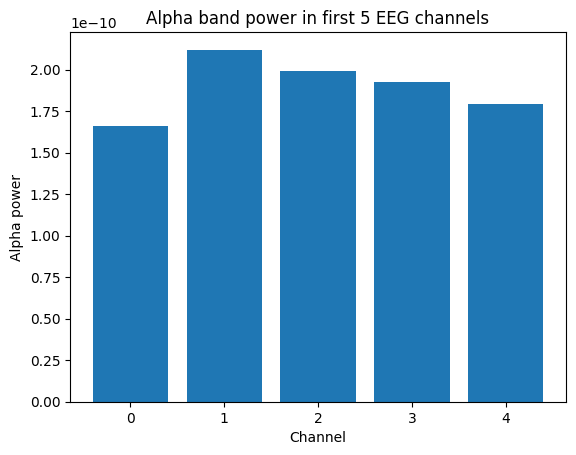

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# گرفتن داده‌های خام از raw
data, times = raw[:,:]  # تمام کانال‌ها و تمام زمان

sfreq = raw.info['sfreq']  # فرکانس نمونه‌برداری

# تعریف باندهای فرکانسی
bands = {'Delta': (1, 4),
         'Theta': (4, 8),
         'Alpha': (8, 13),
         'Beta': (13, 30)}

# تابع برای محاسبه توان در هر باند
def bandpower(data, sf, band):
    fmin, fmax = band
    f, Pxx = welch(data, sf, nperseg=2048)
    # انتخاب فرکانس‌ها در بازه باند
    freq_ix = np.logical_and(f >= fmin, f <= fmax)
    return np.trapz(Pxx[freq_ix], f[freq_ix])  # مساحت زیر نمودار PSD

# محاسبه توان هر باند برای هر کانال
powers = {band: [] for band in bands}
for ch in range(data.shape[0]):
    for band in bands:
        bp = bandpower(data[ch], sfreq, bands[band])
        powers[band].append(bp)

# نمایش توان باند آلفا برای 5 کانال اول
print("Alpha power (first 5 channels):", powers['Alpha'][:5])

# رسم نمودار توان آلفا
plt.bar(np.arange(5), powers['Alpha'][:5])
plt.xlabel('Channel')
plt.ylabel('Alpha power')
plt.title('Alpha band power in first 5 EEG channels')
plt.show()


In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# نمونه داده: فرض کنیم 10 نمونه با ویژگی‌های Delta, Theta, Alpha, Beta داریم
# هر ردیف: یک نمونه، هر ستون: یک ویژگی باند فرکانسی
X = np.array([
    [0.1, 0.3, 0.2, 0.4],
    [0.2, 0.1, 0.4, 0.3],
    [0.15, 0.25, 0.2, 0.35],
    [0.4, 0.3, 0.5, 0.1],
    [0.3, 0.4, 0.45, 0.15],
    [0.35, 0.2, 0.25, 0.3],
    [0.25, 0.3, 0.3, 0.4],
    [0.3, 0.25, 0.35, 0.25],
    [0.2, 0.4, 0.3, 0.3],
    [0.1, 0.3, 0.2, 0.4]
])

# برچسب‌ها: 0=سالم، 1=افسرده (فرضی)
y = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# تقسیم داده به مجموعه آموزش و تست (70% آموزش، 30% تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ساخت مدل لجستیک رگرسیون
model = LogisticRegression()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# ارزیابی دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 33.33%


In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ویژگی‌ها (10 نمونه، 4 ویژگی)
X = np.array([
    [0.15, 0.3, 0.25, 0.4],
    [0.2, 0.1, 0.4, 0.3],
    [0.15, 0.25, 0.2, 0.35],
    [0.4, 0.3, 0.5, 0.1],
    [0.3, 0.4, 0.45, 0.15],
    [0.35, 0.2, 0.25, 0.3],
    [0.25, 0.3, 0.3, 0.4],
    [0.3, 0.25, 0.35, 0.25],
    [0.2, 0.4, 0.3, 0.3],
    [0.1, 0.3, 0.2, 0.4]
])

# برچسب‌ها (0=سالم، 1=افسرده)
y = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ساخت مدل لجستیک رگرسیون
model = LogisticRegression()
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی دقت
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 33.33%


In [31]:
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
print("Weights (w):", model.coef_)       # وزن‌ها برای هر ویژگی
print("Bias (b):", model.intercept_)     # بایاس (همون مقدار b)


Weights (w): [[ 0.08442831  0.09786495  0.17568063 -0.21792414]]
Bias (b): [-0.3297946]
